# Data Loading and Initial Exploration

In [43]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' column as the index
df.set_index('UTC', inplace=True)

# Display the first and last few rows of the DataFrame
print(df.head())
print(df.tail())

# Get a summary of the DataFrame
df.info()

                                 pID            Prd   PrdNorm         Irr
UTC                                                                      
2023-04-13 11:00:00+00:00  Bisceglie  780930.530000  0.791461  917.055833
2023-04-13 12:00:00+00:00  Bisceglie  743441.672500  0.753484  872.392333
2023-04-13 13:00:00+00:00  Bisceglie  578979.020833  0.586780  670.299333
2023-04-13 14:00:00+00:00  Bisceglie  415189.573333  0.420821  478.413500
2023-04-13 15:00:00+00:00  Bisceglie  530802.923333  0.537957  605.063667
                             pID         Prd  PrdNorm       Irr
UTC                                                            
2024-06-19 19:00:00+00:00  Celso  27114.7325  0.00452  5.538500
2024-06-19 20:00:00+00:00  Celso      0.0000  0.00000  0.338333
2024-06-19 21:00:00+00:00  Celso      0.0000  0.00000  0.320833
2024-06-19 22:00:00+00:00  Celso      0.0000  0.00000  0.307000
2024-06-19 23:00:00+00:00  Celso      0.0000  0.00000  0.294500
<class 'pandas.core.frame.DataFram

# Data Overview and Structure

In [44]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


# Handling Missing Data

In [45]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = ['Prd', 'PrdNorm', 'Irr']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no more missing values
print(df.isnull().sum())

pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64
pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64


In [46]:
# Verify data types
print(df.dtypes)

# Ensure all data types are as expected, for example, prd and Irr should be float
df['Prd'] = df['Prd'].astype(float)
df['Irr'] = df['Irr'].astype(float)
df['PrdNorm'] = df['PrdNorm'].astype(float)

# Verify the changes
print(df.dtypes)


pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object
pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object


In [47]:
# Verify the normalization
print(df['PrdNorm'].describe())

count    56007.000000
mean         0.162691
std          0.245157
min          0.000000
25%          0.000000
50%          0.000486
75%          0.290100
max          0.898216
Name: PrdNorm, dtype: float64


In [48]:
# Resample the data to daily production and irradiation
daily_df = df.resample('D').sum()

# Display the first few rows of the resampled DataFrame
print(daily_df.head())


                                                                         pID  \
UTC                                                                            
2023-04-13 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-14 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-15 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-16 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-17 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   

                                    Prd   PrdNorm          Irr  
UTC                                                             
2023-04-13 00:00:00+00:00  2.000873e+07  7.483768  8745.116870  
2023-04-14 00:00:00+00:00  2.737290e+07  6.198623  7305.307037  
2023-04-15 00:00:00+00:00  2.239684e+07  8.372315  9376.017170  
2023-04-16 00:00:00+00:00  1.527575e+07  6.041580  6571.661265  
2023-04-17 00:00:00+00:00  1.045721e+07  3.385164

In [49]:
# Generate descriptive statistics
daily_stats = daily_df.describe()
print(daily_stats)


                Prd     PrdNorm           Irr
count  4.340000e+02  434.000000    434.000000
mean   6.049409e+07   20.995030  25190.618963
std    3.167005e+07    9.611651  11863.851007
min    0.000000e+00    0.000000      0.000000
25%    3.726667e+07   12.985842  15604.705024
50%    5.625551e+07   20.953532  24682.439795
75%    7.993752e+07   27.567742  32963.240674
max    1.696259e+08   50.245950  61883.108917


# data Visualization

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


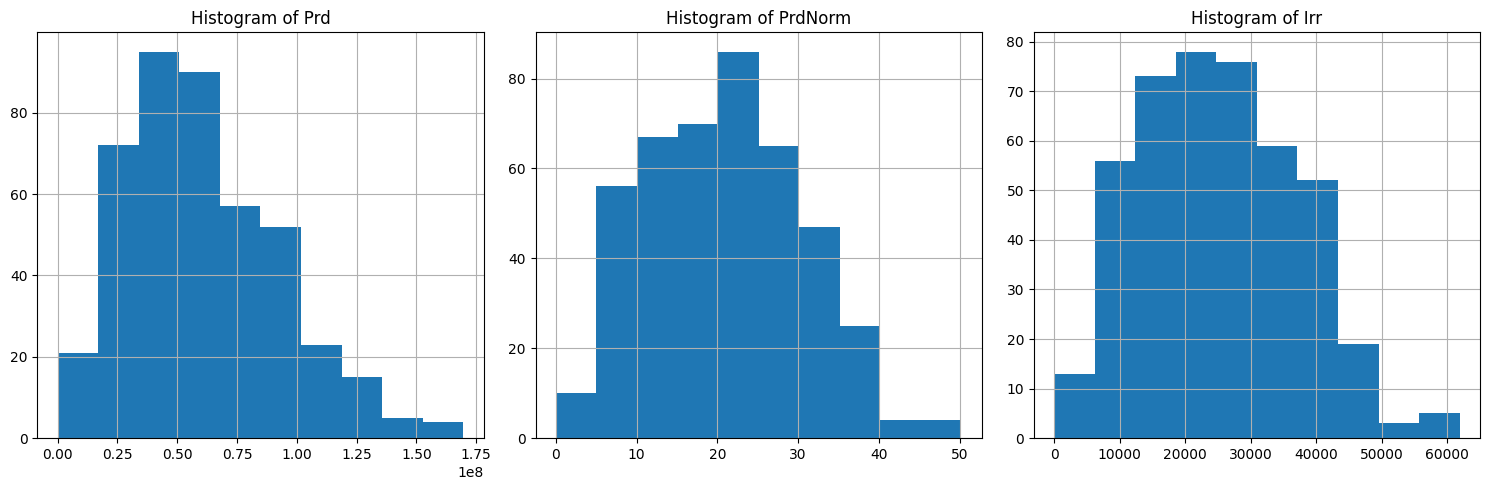

In [51]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
daily_df['Prd'].hist(ax=axes[0])
axes[0].set_title('Histogram of Prd')
daily_df['PrdNorm'].hist(ax=axes[1])
axes[1].set_title('Histogram of PrdNorm')
daily_df['Irr'].hist(ax=axes[2])
axes[2].set_title('Histogram of Irr')
plt.tight_layout()
plt.show()

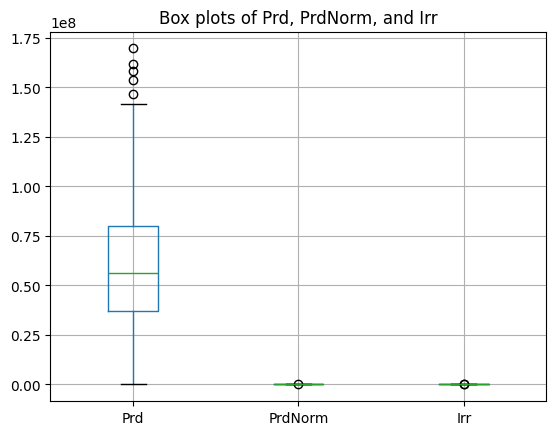

In [52]:
daily_df.boxplot(column=['Prd', 'PrdNorm', 'Irr'])
plt.title('Box plots of Prd, PrdNorm, and Irr')
plt.show()

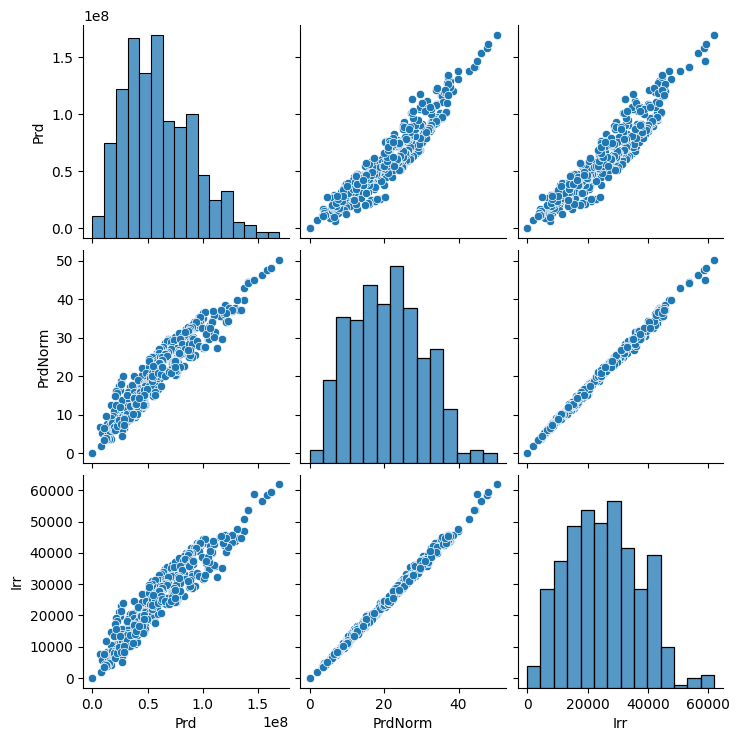

In [53]:
# Bivariate Analysis
sns.pairplot(daily_df[['Prd', 'PrdNorm', 'Irr']])
plt.show()

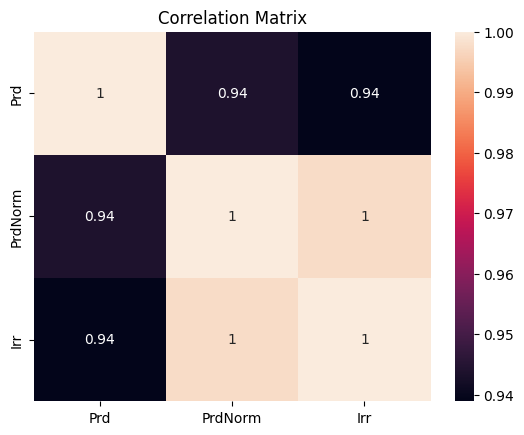

In [54]:
# Correlation Matrix
corr_matrix = daily_df[['Prd', 'PrdNorm', 'Irr']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis

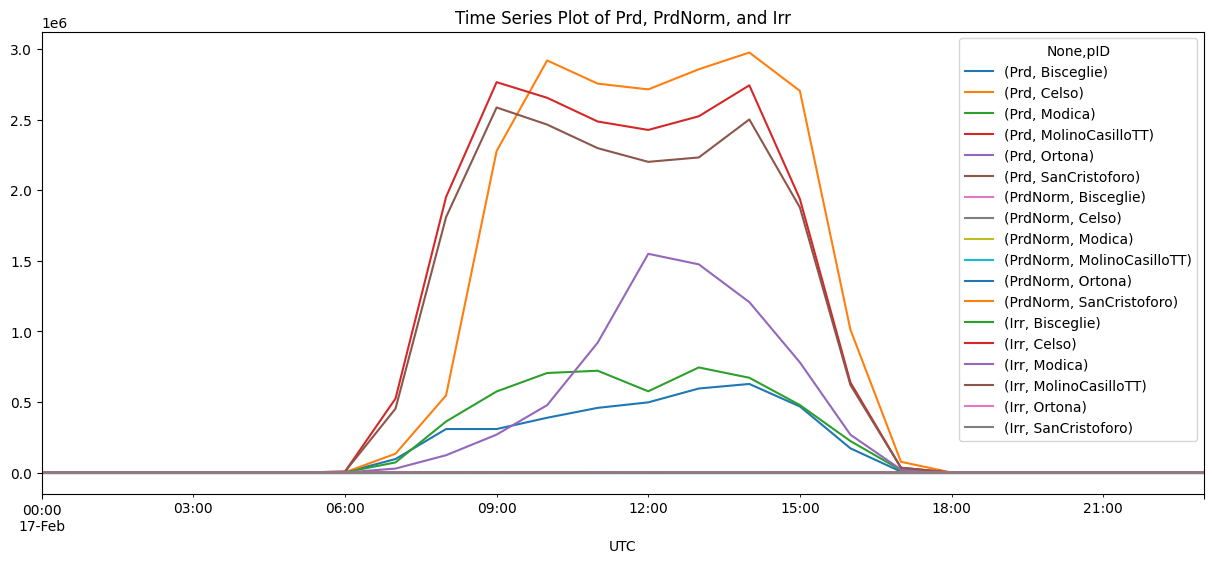

In [55]:
# Time Series Analysis
df.set_index('pID', append=True).unstack(level=1).sort_index().loc['2024-02-17'][['Prd', 'PrdNorm', 'Irr']].plot(figsize=(15, 6))

plt.title('Time Series Plot of Prd, PrdNorm, and Irr')
plt.show()


In [56]:
df.set_index('pID', append=True).unstack(level=1)

Prd                                       \
pID                            Bisceglie       Celso   Modica MolinoCasilloTT   
UTC                                                                             
2023-04-13 11:00:00+00:00  780930.530000         NaN      NaN    3.167157e+06   
2023-04-13 12:00:00+00:00  743441.672500         NaN      NaN    3.112100e+06   
2023-04-13 13:00:00+00:00  578979.020833         NaN      NaN    3.126391e+06   
2023-04-13 14:00:00+00:00  415189.573333         NaN      NaN    2.061898e+06   
2023-04-13 15:00:00+00:00  530802.923333         NaN      NaN    2.355887e+06   
...                                  ...         ...      ...             ...   
2024-06-19 19:00:00+00:00    2787.246667  27114.7325  1416.39    1.169771e+04   
2024-06-19 20:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 21:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 22:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 23:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   

                                                        PrdNorm           \
pID                              Ortona SanCristoforo Bisceglie    Celso   
UTC                                                                        
2023-04-13 11:00:00+00:00      0.000000           NaN  0.791461      NaN   
2023-04-13 12:00:00+00:00      0.000000           NaN  0.753484      NaN   
2023-04-13 13:00:00+00:00      0.000000           NaN  0.586780      NaN   
2023-04-13 14:00:00+00:00      0.000000           NaN  0.420821      NaN   
2023-04-13 15:00:00+00:00      0.000000           NaN  0.537957      NaN   
...                                 ...           ...       ...      ...   
2024-06-19 19:00:00+00:00  13733.264167  15361.586667  0.002817  0.00452   
2024-06-19 20:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 21:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 22:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 23:00:00+00:00      0.000000      0.000000  0.000000  0.00000   

                                                                             \
pID                          Modica MolinoCasilloTT    Ortona SanCristoforo   
UTC                                                                           
2023-04-13 11:00:00+00:00       NaN        0.712887  0.000000           NaN   
2023-04-13 12:00:00+00:00       NaN        0.700477  0.000000           NaN   
2023-04-13 13:00:00+00:00       NaN        0.703715  0.000000           NaN   
2023-04-13 14:00:00+00:00       NaN        0.464113  0.000000           NaN   
2023-04-13 15:00:00+00:00       NaN        0.530251  0.000000           NaN   
...                             ...             ...       ...           ...   
2024-06-19 19:00:00+00:00  0.001419        0.002632  0.006091      0.003179   
2024-06-19 20:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 21:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 22:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 23:00:00+00:00  0.000000        0.000000  0.000000      0.000000   

                                  Irr                                      \
pID                         Bisceglie     Celso    Modica MolinoCasilloTT   
UTC                                                                         
2023-04-13 11:00:00+00:00  917.055833       NaN       NaN      809.252296   
2023-04-13 12:00:00+00:00  872.392333       NaN       NaN      798.701926   
2023-04-13 13:00:00+00:00  670.299333       NaN       NaN      821.734370   
2023-04-13 14:00:00+00:00  478.413500       NaN       NaN      520.583704   
2023-04-13 15:00:00+00:00  605.063667       NaN       NaN      614.145926   
...                               ...       ...       ...             ...   
2024-06-19 19:00:00+00:00    2.980667

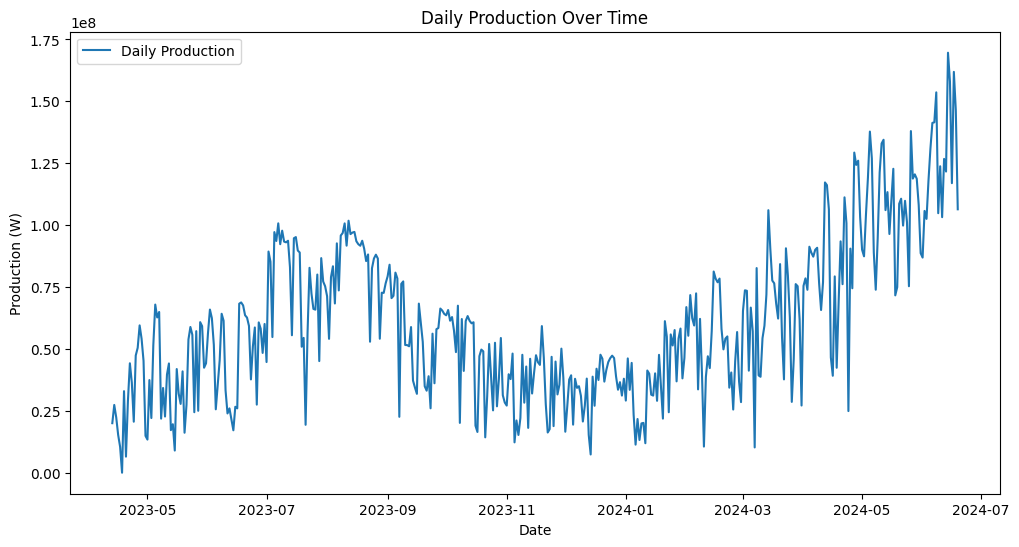

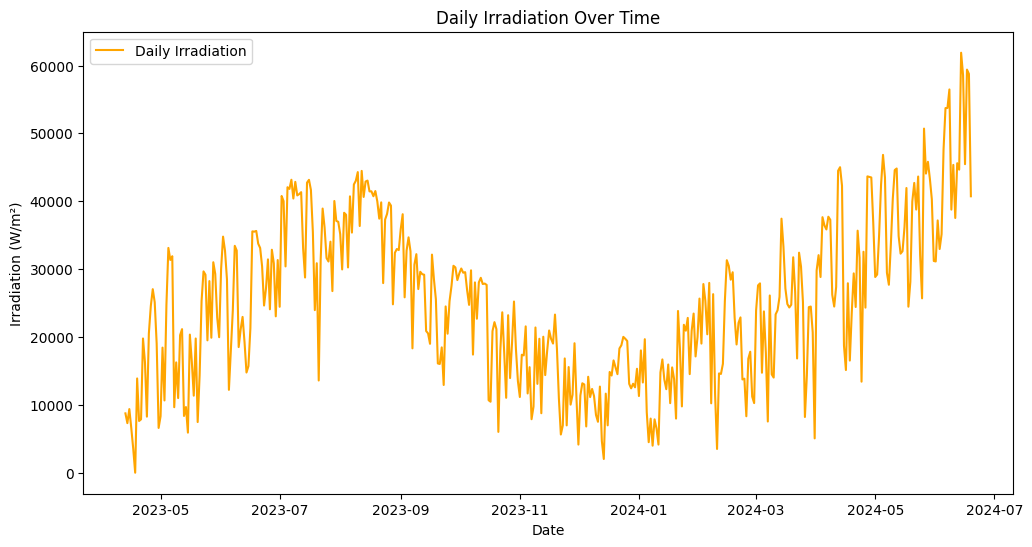

In [57]:
import matplotlib.pyplot as plt

# Plot daily production
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Prd'], label='Daily Production')
plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (W)')
plt.legend()
plt.show()

# Plot daily irradiation
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Irr'], label='Daily Irradiation', color='orange')
plt.title('Daily Irradiation Over Time')    
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m²)')
plt.legend()
plt.show()


# Feature Engineering: Creating Cyclical Features

This code creates cyclical features from the timestamp index of the DataFrame, allowing for the modeling of seasonal patterns in time series data. By transforming time-related features using sine and cosine functions, it retains the cyclical nature of hours, days, months, and days of the week.

### Feature Creation
- **Extracting Time Components**: The following features are extracted from the DataFrame's index:
  - `hour`: Extracted from the index to represent the hour of the day.
  - `day`: Extracted to represent the day of the month.
  - `month`: Extracted to represent the month of the year.
  - `dayofweek`: Extracted to represent the day of the week (0=Monday, 6=Sunday).

### Feature Transformation
- **Sine and Cosine Transformation**: The extracted features are transformed using sine and cosine functions to capture their cyclical nature:
  - `hour_sin` and `hour_cos`: Represent the cyclical nature of hours in a day.
  - `day_sin` and `day_cos`: Represent the cyclical nature of days in a month.
  - `month_sin` and `month_cos`: Represent the cyclical nature of months in a year.
  - `dayofweek_sin` and `dayofweek_cos`: Represent the cyclical nature of days in a week.

### Dropping Original Columns
- The original time-related columns (`hour`, `day`, `month`, `dayofweek`) are dropped from the DataFrame to retain only the transformed cyclical features.


In [58]:
import numpy as np

# Creating cyclical features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

# Transforming the features using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# Dropping the original columns used for transformation
df.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)


# Data Splitting: Preparing Features and Target for Model Training

In [59]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df[['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']]
y = df['PrdNorm']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
X_train.shape

(44805, 9)

In [61]:
y_train.shape

(44805,)

In [62]:
df

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2023-04-13 11:00:00+00:00,Bisceglie,780930.530000,0.791461,917.055833,2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 12:00:00+00:00,Bisceglie,743441.672500,0.753484,872.392333,1.224647e-16,-1.000000,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 13:00:00+00:00,Bisceglie,578979.020833,0.586780,670.299333,-2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 14:00:00+00:00,Bisceglie,415189.573333,0.420821,478.413500,-5.000000e-01,-0.866025,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 15:00:00+00:00,Bisceglie,530802.923333,0.537957,605.063667,-7.071068e-01,-0.707107,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00+00:00,Celso,27114.732500,0.004520,5.538500,-9.659258e-01,0.258819,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 20:00:00+00:00,Celso,0.000000,0.000000,0.338333,-8.660254e-01,0.500000,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 21:00:00+00:00,Celso,0.000000,0.000000,0.320833,-7.071068e-01,0.707107,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [63]:
df.loc['2024-06-19 23:00:00+00:00']

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2024-06-19 23:00:00+00:00,Bisceglie,0.0,0.0,0.016833,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Modica,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Ortona,0.0,0.0,0.541000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,SanCristoforo,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,MolinoCasilloTT,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Celso,0.0,0.0,0.294500,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [64]:
from sklearn.metrics import mean_absolute_error
import numpy as np


# Defining Evaluation Metrics for Model Performance

In [65]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    # Remove zeros from y_true to avoid division by zero
    non_zero_indices = y_true != 0
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    # Add a small constant to avoid division by very small values
    y_true_non_zero = np.where(y_true_non_zero == 0, 1e-5, y_true_non_zero)

    # Calculate MAPE
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero) * 100)
    return mape

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)"""
    # Remove zeros from y_true and y_pred to avoid division by zero
    non_zero_indices = (y_true != 0) | (y_pred != 0)  # Include non-zero predictions too
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    # Calculate SMAPE
    smape = np.mean(np.abs(y_true_non_zero - y_pred_non_zero) / 
                    ((np.abs(y_true_non_zero) + np.abs(y_pred_non_zero)) / 2) * 100)
    return smape

def mean_bias_error(y_true, y_pred):
    """Calculate Mean Bias Error (MBE)"""
    mbe = np.mean(y_pred - y_true)
    return mbe

def mean_absolute_error(y_true, y_pred):
    """Calculate Mean Absolute Error (MAE)"""
    mae = np.mean(np.abs(y_pred - y_true))
    return mae

def root_mean_squared_error(y_true, y_pred):
    """Calculate Root Mean Squared Error (RMSE)"""
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    return rmse

def r_squared(y_true, y_pred):
    """Calculate R²"""
    ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2



In [66]:
# First, create a mask to filter out zeros in 'Prd'
non_zero_mask = df['Prd'] != 0

# Apply the mask to the DataFrame to create a new DataFrame without zeros
df_non_zero = df[non_zero_mask]

# Count the number of zeros in the original DataFrame
zero_count_original = (df['Prd'] == 0).sum()

# Count the number of zeros in the non-zero DataFrame
zero_count_after_removal = (df_non_zero['Prd'] == 0).sum()

# Print the results
print(f"Number of zeros in the original dataset: {zero_count_original}")
print(f"Number of zeros in the dataset after removal: {zero_count_after_removal}")


Number of zeros in the original dataset: 26875
Number of zeros in the dataset after removal: 0


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value = mean_absolute_percentage_error(y_test.values, y_pred)
smape_value = symmetric_mean_absolute_percentage_error(y_test.values, y_pred)
mbe_value = mean_bias_error(y_test.values, y_pred)
mae_value = mean_absolute_error(y_test.values, y_pred)
rmse_value = root_mean_squared_error(y_test.values, y_pred)
r2_value = r_squared(y_test.values, y_pred)

# Print the results
print(f"MAPE: {mape_value:.2f}%")
print(f"SMAPE: {smape_value:.2f}%")
print(f"MBE: {mbe_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
print(f"R²: {r2_value:.2f}")


MAPE: 51.08%
SMAPE: 36.27%
MBE: -0.00
MAE: 0.01
RMSE: 0.02
R²: 0.99


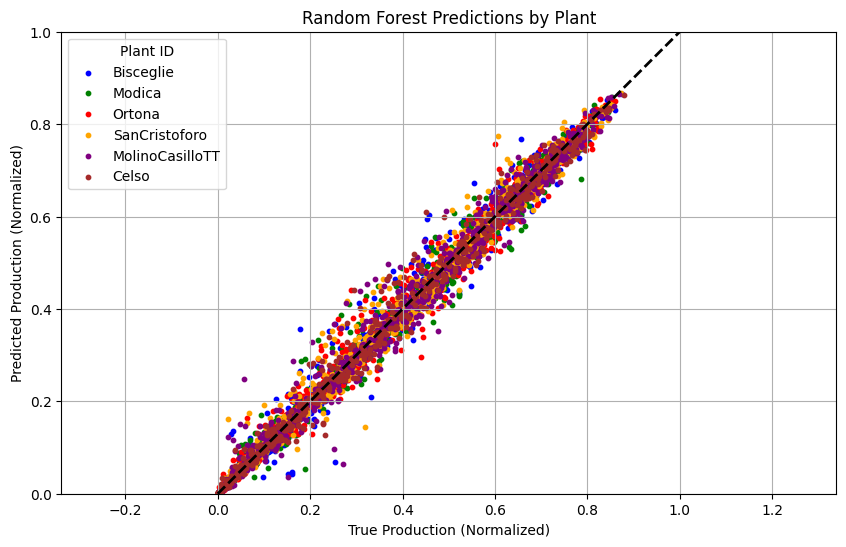

In [68]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred to a pandas Series if it's a NumPy array
if isinstance(y_pred, np.ndarray):
    y_pred = pd.Series(y_pred)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('Random Forest Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


In [69]:
print("Maximum predicted production (Normalized):", y_pred.max())


Maximum predicted production (Normalized): 0.8678254219227065


# xgboost

In [70]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_xgb = mean_absolute_percentage_error(y_test.values, y_pred_xgb)
smape_value_xgb = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_xgb)
mbe_value_xgb = mean_bias_error(y_test.values, y_pred_xgb)
mae_value_xgb = mean_absolute_error(y_test.values, y_pred_xgb)
rmse_value_xgb = root_mean_squared_error(y_test.values, y_pred_xgb)
r2_value_xgb = r_squared(y_test.values, y_pred_xgb)

# Print the results
print(f"MAPE: {mape_value_xgb:.2f}%")
print(f"SMAPE: {smape_value_xgb:.2f}%")
print(f"MBE: {mbe_value_xgb:.2f}")
print(f"MAE: {mae_value_xgb:.2f}")
print(f"RMSE: {rmse_value_xgb:.2f}")
print(f"R²: {r2_value_xgb:.2f}")

MAPE: 843.93%
SMAPE: 104.07%
MBE: -0.00
MAE: 0.01
RMSE: 0.02
R²: 0.99


In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7, 9],         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],      # Fraction of samples used for fitting
    'colsample_bytree': [0.6, 0.8, 1.0] # Fraction of features used for each tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
xgb_model_best = xgb.XGBRegressor(**best_params, random_state=42)
xgb_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_best = xgb_model_best.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_xgb_best = mean_absolute_percentage_error(y_test.values, y_pred_xgb_best)
smape_value_xgb_best = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_xgb_best)
mbe_value_xgb_best = mean_bias_error(y_test.values, y_pred_xgb_best)
mae_value_xgb_best = mean_absolute_error(y_test.values, y_pred_xgb_best)
rmse_value_xgb_best = root_mean_squared_error(y_test.values, y_pred_xgb_best)
r2_value_xgb_best = r_squared(y_test.values, y_pred_xgb_best)

# Print the results
print(f"XGBoost Model with Best Parameters Metrics:")
print(f"MAPE: {mape_value_xgb_best:.2f}%")
print(f"SMAPE: {smape_value_xgb_best:.2f}%")
print(f"MBE: {mbe_value_xgb_best:.2f}")
print(f"MAE: {mae_value_xgb_best:.2f}")
print(f"RMSE: {rmse_value_xgb_best:.2f}")
print(f"R²: {r2_value_xgb_best:.2f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END 

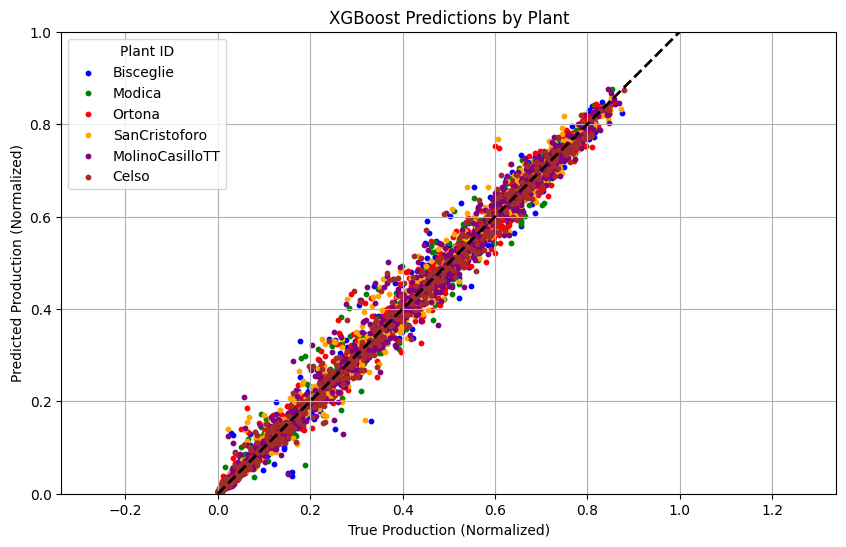

In [73]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_xgb to a pandas Series if it's a NumPy array
if isinstance(y_pred_xgb_best, np.ndarray):
    y_pred_xgb_best = pd.Series(y_pred_xgb_best)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_xgb_best[plant_mask].values, 
                s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('XGBoost Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# SVR

In [74]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Define the SVR model (you can tune hyperparameters like kernel, C, and epsilon)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_svr = mean_absolute_percentage_error(y_test.values, y_pred_svr)
smape_value_svr = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_svr)
mbe_value_svr = mean_bias_error(y_test.values, y_pred_svr)
mae_value_svr = mean_absolute_error(y_test.values, y_pred_svr)
rmse_value_svr = root_mean_squared_error(y_test.values, y_pred_svr)
r2_value_svr = r_squared(y_test.values, y_pred_svr)

# Print the results
print(f"SVR MAPE: {mape_value_svr:.2f}%")
print(f"SVR SMAPE: {smape_value_svr:.2f}%")
print(f"SVR MBE: {mbe_value_svr:.2f}")
print(f"SVR MAE: {mae_value_svr:.2f}")
print(f"SVR RMSE: {rmse_value_svr:.2f}")
print(f"SVR R²: {r2_value_svr:.2f}")

SVR MAPE: 199310.56%
SVR SMAPE: 120.53%
SVR MBE: 0.02
SVR MAE: 0.05
SVR RMSE: 0.05
SVR R²: 0.96


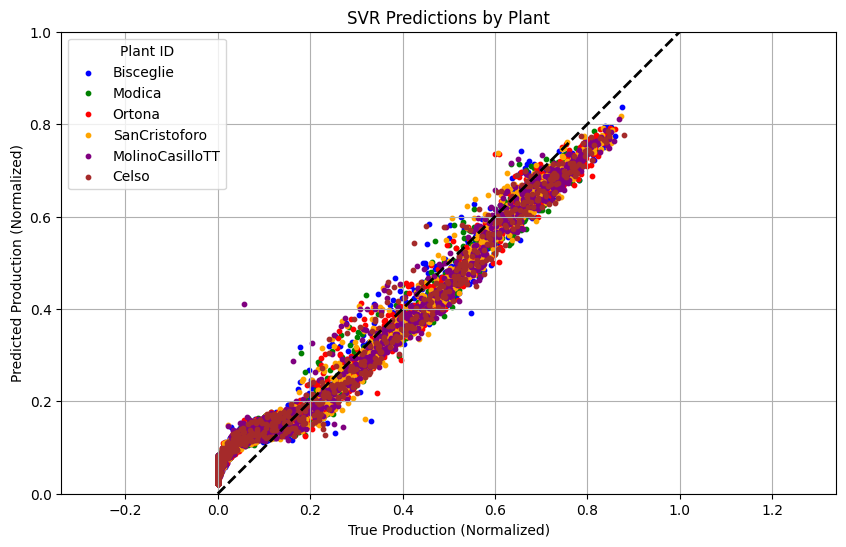

In [75]:
# Visualizing the predictions
# Reset index for X_test and y_test to ensure they align
X_test_with_pID_svr = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred to a pandas Series if it's a NumPy array
if isinstance(y_pred_svr, np.ndarray):
    y_pred_svr = pd.Series(y_pred_svr)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID_svr['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Create a scatter plot for SVR predictions
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID_svr['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_svr[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SVR Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [76]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [1, 10, 100, 1000],
#     'epsilon': [0.01, 0.1, 0.5, 1.0],
#     'kernel': ['linear', 'poly', 'rbf']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_absolute_error', cv=5)

# # Fit the model
# grid_search.fit(X_train_scaled, y_train)

# # Get the best estimator
# best_svr_model = grid_search.best_estimator_

# # Make predictions with the best model
# y_pred_svr = best_svr_model.predict(X_test_scaled)

# # Evaluate the model using your pre-defined metrics
# mape_value_svr = mean_absolute_percentage_error(y_test.values, y_pred_svr)
# smape_value_svr = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_svr)
# mbe_value_svr = mean_bias_error(y_test.values, y_pred_svr)
# mae_value_svr = mean_absolute_error(y_test.values, y_pred_svr)
# rmse_value_svr = root_mean_squared_error(y_test.values, y_pred_svr)
# r2_value_svr = r_squared(y_test.values, y_pred_svr)

# # Print the results
# print(f"SVR MAPE: {mape_value_svr:.2f}%")
# print(f"SVR SMAPE: {smape_value_svr:.2f}%")
# print(f"SVR MBE: {mbe_value_svr:.2f}")
# print(f"SVR MAE: {mae_value_svr:.2f}")
# print(f"SVR RMSE: {rmse_value_svr:.2f}")
# print(f"SVR R²: {r2_value_svr:.2f}")


# SNN

Epoch 1/50
1121/1121 [==============================] - 1s 554us/step - loss: 4.7342 - val_loss: 0.0012
Epoch 2/50
1121/1121 [==============================] - 1s 500us/step - loss: 6.4084e-04 - val_loss: 4.7507e-04
Epoch 3/50
1121/1121 [==============================] - 1s 531us/step - loss: 8.3875e-04 - val_loss: 0.0056
Epoch 4/50
1121/1121 [==============================] - 1s 502us/step - loss: 0.0014 - val_loss: 0.0067
Epoch 5/50
1121/1121 [==============================] - 1s 503us/step - loss: 0.0454 - val_loss: 0.0057
Epoch 6/50
1121/1121 [==============================] - 1s 503us/step - loss: 0.0014 - val_loss: 4.5521e-04
Epoch 7/50
1121/1121 [==============================] - 1s 503us/step - loss: 0.0200 - val_loss: 0.0021
Epoch 8/50
1121/1121 [==============================] - 1s 568us/step - loss: 0.0024 - val_loss: 0.0058
Epoch 9/50
1121/1121 [==============================] - 1s 594us/step - loss: 0.0081 - val_loss: 6.9209e-04
Epoch 10/50
1121/1121 [=====================

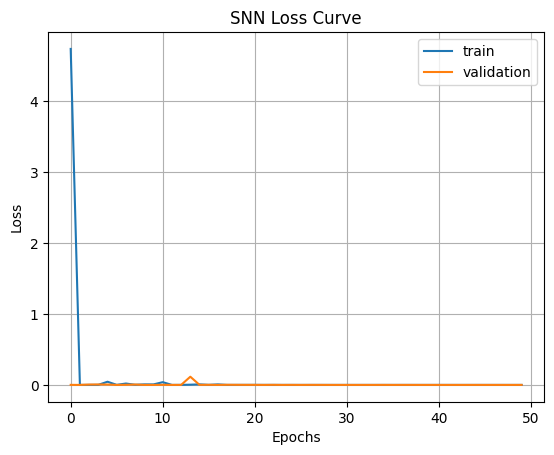

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the SNN architecture
def build_snn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))  # Input layer with 64 neurons
    model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
    model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
    model.add(Dense(1))  # Output layer (no activation for regression)
    return model

# Compile the model
snn_model = build_snn_model(X_train.shape[1])
snn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = snn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_snn = snn_model.predict(X_test)

# Ensure y_pred_snn is a 1D array by flattening it
y_pred_snn = y_pred_snn.ravel()

# Evaluate the model using the pre-defined metrics
mape_value_snn = mean_absolute_percentage_error(y_test.values, y_pred_snn)
smape_value_snn = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_snn)
mbe_value_snn = mean_bias_error(y_test.values, y_pred_snn)
mae_value_snn = mean_absolute_error(y_test.values, y_pred_snn)
rmse_value_snn = root_mean_squared_error(y_test.values, y_pred_snn)
r2_value_snn = r_squared(y_test.values, y_pred_snn)

# Print the results
print(f"MAPE (SNN): {mape_value_snn:.2f}%")
print(f"SMAPE (SNN): {smape_value_snn:.2f}%")
print(f"MBE (SNN): {mbe_value_snn:.2f}")
print(f"MAE (SNN): {mae_value_snn:.2f}")
print(f"RMSE (SNN): {rmse_value_snn:.2f}")
print(f"R² (SNN): {r2_value_snn:.2f}")

# Plot the loss curve for visualization
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('SNN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


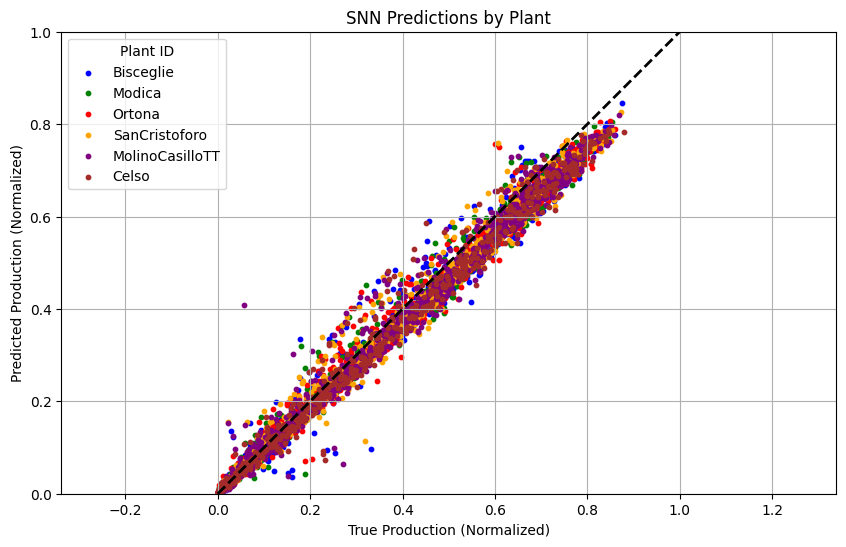

In [78]:
import matplotlib.pyplot as plt

# Ensure y_pred_snn is a pandas Series if it's a NumPy array
if isinstance(y_pred_snn, np.ndarray):
    y_pred_snn = pd.Series(y_pred_snn)

# Reset index for y_test and X_test to ensure they align
y_test = y_test.reset_index(drop=True)
X_test_with_pID = X_test.copy().reset_index(drop=True)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant (same color scheme as before)
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot for the SNN model
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_snn[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SNN Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# RNN

In [152]:
# Reshape input data to 3D for RNN: (samples, time_steps, features)

X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 3, X_train.shape[1] // 3))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 3, X_test.shape[1] // 3))

In [156]:
X_train.shape

(44804, 9)

In [153]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score



# Define the RNN model with LSTM layers
rnn_model = Sequential()

# Add an LSTM layer with 100 units and dropout
rnn_model.add(LSTM(100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
rnn_model.add(Dropout(0.3))  # Increased dropout

# Add a second LSTM layer with 50 units
rnn_model.add(LSTM(50, activation='relu'))
rnn_model.add(Dropout(0.3))  # Increased dropout

# Add dense layers
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(16, activation='relu'))

# Add an output layer
rnn_model.add(Dense(1))

# Compile the model with a slightly higher learning rate
opt = Adam(learning_rate=0.0001)  # Increased learning rate
rnn_model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [154]:
# Train the model with callbacks
rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), callbacks=[early_stop, lr_scheduler])

Epoch 1/100
2801/2801 [==============================] - 7s 2ms/step - loss: 0.1186 - mae: 0.1336 - val_loss: 0.0193 - val_mae: 0.0931 - lr: 1.0000e-04
Epoch 2/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.0144 - mae: 0.0741 - val_loss: 0.0182 - val_mae: 0.0799 - lr: 1.0000e-04
Epoch 3/100
2801/2801 [==============================] - 7s 2ms/step - loss: 0.0079 - mae: 0.0510 - val_loss: 0.0095 - val_mae: 0.0553 - lr: 1.0000e-04
Epoch 4/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.0059 - mae: 0.0424 - val_loss: 0.0124 - val_mae: 0.0613 - lr: 1.0000e-04
Epoch 5/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.0054 - mae: 0.0393 - val_loss: 0.0084 - val_mae: 0.0504 - lr: 1.0000e-04
Epoch 6/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.0050 - mae: 0.0375 - val_loss: 0.0085 - val_mae: 0.0499 - lr: 1.0000e-04
Epoch 7/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.0047 - ma

In [155]:
# Make predictions on the test set
y_pred_rnn = rnn_model.predict(X_test_reshaped)

# Flatten the predictions to a 1D array
y_pred_rnn = y_pred_rnn.ravel()

# Define a function for adjusted MAPE
def adjusted_mape(y_true, y_pred, epsilon=1e-6):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Evaluate the RNN model
mape_rnn = adjusted_mape(y_test.values, y_pred_rnn)
smape_rnn = mean_absolute_percentage_error(y_test.values, y_pred_rnn)
mbe_rnn = np.mean(y_pred_rnn - y_test.values)  # Mean Bias Error
mae_rnn = mean_absolute_error(y_test.values, y_pred_rnn)
rmse_rnn = np.sqrt(mean_squared_error(y_test.values, y_pred_rnn))
r2_rnn = r2_score(y_test.values, y_pred_rnn)

# Print the evaluation results
print(f"RNN Adjusted MAPE: {mape_rnn:.2f}%")
print(f"RNN SMAPE: {smape_rnn:.2f}%")
print(f"RNN MBE: {mbe_rnn:.2f}")
print(f"RNN MAE: {mae_rnn:.2f}")
print(f"RNN RMSE: {rmse_rnn:.2f}")
print(f"RNN R²: {r2_rnn:.2f}")



# Make predictions on the test set
y_pred_rnn = rnn_model.predict(X_test_reshaped)

# Flatten the predictions to a 1D array
y_pred_rnn = y_pred_rnn.ravel()

# Define a function for adjusted MAPE
# handle small values in y_test by adding a small epsilon during MAPE calculation to prevent division by very small numbers.
def adjusted_mape(y_true, y_pred, epsilon=1e-6):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Evaluate the RNN model
mape_rnn = adjusted_mape(y_test.values, y_pred_rnn)
smape_rnn = np.mean(2 * np.abs(y_pred_rnn - y_test.values) / (np.abs(y_pred_rnn) + np.abs(y_test.values))) * 100
mbe_rnn = np.mean(y_pred_rnn - y_test.values)  # Mean Bias Error
mae_rnn = mean_absolute_error(y_test.values, y_pred_rnn)
rmse_rnn = np.sqrt(mean_squared_error(y_test.values, y_pred_rnn))
r2_rnn = r2_score(y_test.values, y_pred_rnn)

# Print the evaluation results
print(f"RNN Adjusted MAPE: {mape_rnn:.2f}%")
print(f"RNN SMAPE: {smape_rnn:.2f}%")
print(f"RNN MBE: {mbe_rnn:.2f}")
print(f"RNN MAE: {mae_rnn:.2f}")
print(f"RNN RMSE: {rmse_rnn:.2f}")
print(f"RNN R²: {r2_rnn:.2f}")






351/351 [==============================] - 0s 818us/step
RNN Adjusted MAPE: 78654.64%
RNN SMAPE: 3527901183894.54%
RNN MBE: -0.03
RNN MAE: 0.05
RNN RMSE: 0.09
RNN R²: 0.87
351/351 [==============================] - 0s 891us/step
RNN Adjusted MAPE: 78654.64%
RNN SMAPE: 119.27%
RNN MBE: -0.03
RNN MAE: 0.05
RNN RMSE: 0.09
RNN R²: 0.87


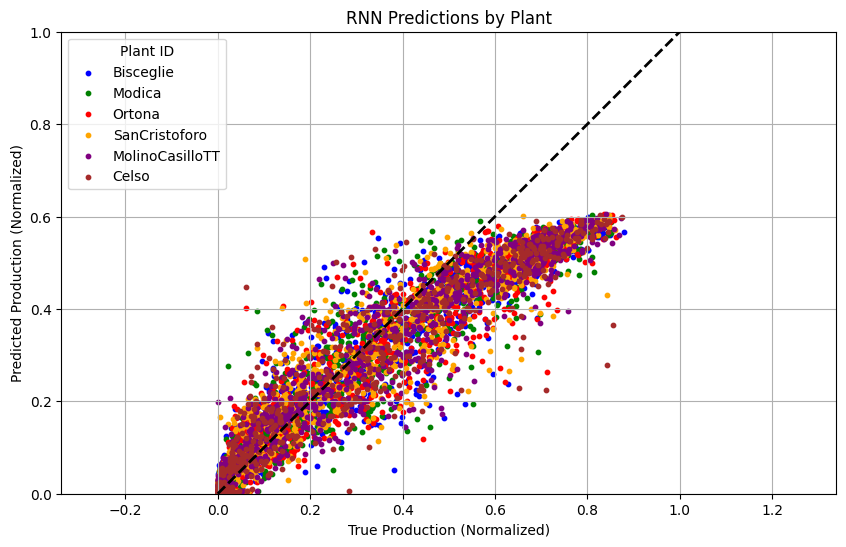

In [143]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# If y_pred_rnn is a NumPy array, convert it to a pandas Series for compatibility
if isinstance(y_pred_rnn, np.ndarray):
    y_pred_rnn = pd.Series(y_pred_rnn)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_rnn[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('RNN Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# Transformer

Epoch 1/50
1121/1121 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 6.2540e-04
Epoch 2/50
1121/1121 [==============================] - 1s 948us/step - loss: 5.8161e-04 - val_loss: 6.9222e-04
Epoch 3/50
1121/1121 [==============================] - 1s 917us/step - loss: 5.3495e-04 - val_loss: 4.8737e-04
Epoch 4/50
1121/1121 [==============================] - 1s 942us/step - loss: 5.0001e-04 - val_loss: 4.5868e-04
Epoch 5/50
1121/1121 [==============================] - 1s 1ms/step - loss: 4.9653e-04 - val_loss: 6.6498e-04
Epoch 6/50
1121/1121 [==============================] - 1s 1ms/step - loss: 4.7582e-04 - val_loss: 5.1059e-04
Epoch 7/50
1121/1121 [==============================] - 1s 997us/step - loss: 4.6842e-04 - val_loss: 4.8394e-04
Epoch 8/50
1121/1121 [==============================] - 1s 1ms/step - loss: 4.5305e-04 - val_loss: 4.6124e-04
Epoch 9/50
1121/1121 [==============================] - 1s 1ms/step - loss: 4.5638e-04 - val_loss: 4.2477e-04
Epoch 

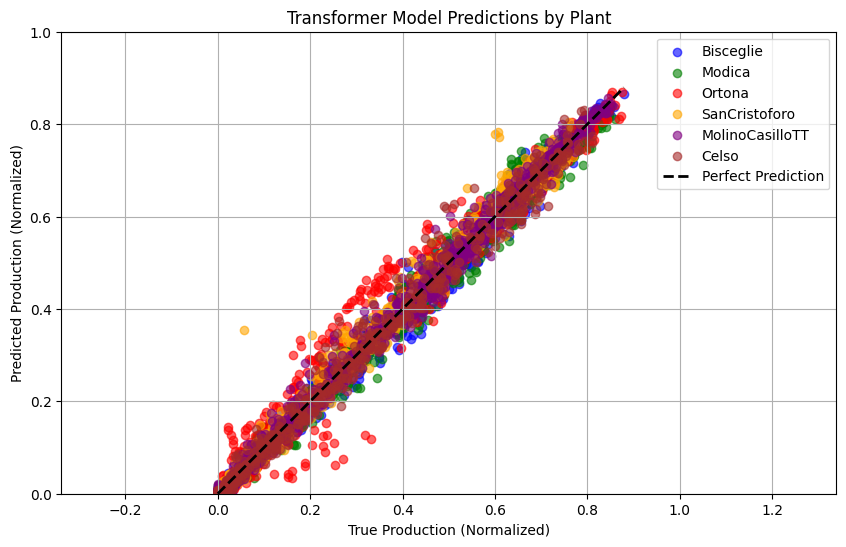

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already preprocessed
# Define features and target
features = ['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']
target = 'PrdNorm'

# Split the dataset
X = df[features]
y = df[target]

# Include plant IDs in the training/testing sets
pID = df['pID']  # Assuming 'pID' is a column in your DataFrame
X_train, X_test, y_train, y_test, pID_train, pID_test = train_test_split(X, y, pID, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for Transformer input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the Transformer model
def create_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.Conv1D(64, 3, activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)  # Output layer for regression
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = create_transformer_model((X_train_reshaped.shape[1], 1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Fit the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.reshape(-1)  # Reshape to 1D
y_test_values = y_test.values.flatten()  # Ensure y_test is a 1D array

# Evaluate the model
mape_value = mean_absolute_percentage_error(y_test_values, y_pred)
smape_value = symmetric_mean_absolute_percentage_error(y_test_values, y_pred)
mbe_value = mean_bias_error(y_test_values, y_pred)
mae_value = mean_absolute_error(y_test_values, y_pred)
rmse_value = root_mean_squared_error(y_test_values, y_pred)
r2_value = r_squared(y_test_values, y_pred)

# Print the results
print(f"MAPE: {mape_value:.2f}%")
print(f"SMAPE: {smape_value:.2f}%")
print(f"MBE: {mbe_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
print(f"R²: {r2_value:.2f}")


# Create a DataFrame for predictions to include plant IDs
predictions_df = pd.DataFrame({
    'True': y_test_values,
    'Predicted': y_pred,
    'pID': pID_test.reset_index(drop=True)  # Reset index to align correctly
})

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = predictions_df['pID'] == plant
    plt.scatter(predictions_df['True'][plant_mask], predictions_df['Predicted'][plant_mask], 
                color=color, alpha=0.6, label=plant)

# Add a reference line for perfect predictions
plt.plot([min(y_test_values), max(y_test_values)], 
         [min(y_test_values), max(y_test_values)], 'k--', lw=2, label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('Transformer Model Predictions by Plant')
plt.legend()
plt.grid(True)  # Optional: add grid for better visibility
plt.axis('equal')  # Make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# +1 hour forecasting

In [85]:
# Shift the target variable (PrdNorm) by -1 to predict the next hour's production
df['PrdNorm_1hour_ahead'] = df['PrdNorm'].shift(-1)

# Drop the last row as it will have NaN for the shifted value
df = df.dropna(subset=['PrdNorm_1hour_ahead'])

# Define features and the new target
features = ['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']
target = 'PrdNorm_1hour_ahead'

X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test, pID_train, pID_test = train_test_split(X, y, df['pID'], test_size=0.2, random_state=42)

# Apply scaling (as done earlier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions for +1 hour ahead
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mape_value_rf = mean_absolute_percentage_error(y_test.values, y_pred_rf)
smape_value_rf = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_rf)
mbe_value_rf = mean_bias_error(y_test.values, y_pred_rf)
mae_value_rf = mean_absolute_error(y_test.values, y_pred_rf)
rmse_value_rf = root_mean_squared_error(y_test.values, y_pred_rf)
r2_value_rf = r_squared(y_test.values, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest MAPE (+1 hour ahead): {mape_value_rf:.2f}%")
print(f"Random Forest SMAPE (+1 hour ahead): {smape_value_rf:.2f}%")
print(f"Random Forest MBE (+1 hour ahead): {mbe_value_rf:.2f}")
print(f"Random Forest MAE (+1 hour ahead): {mae_value_rf:.2f}")
print(f"Random Forest RMSE (+1 hour ahead): {rmse_value_rf:.2f}")
print(f"Random Forest R² (+1 hour ahead): {r2_value_rf:.2f}")


Random Forest MAPE (+1 hour ahead): 420.29%
Random Forest SMAPE (+1 hour ahead): 47.40%
Random Forest MBE (+1 hour ahead): -0.00
Random Forest MAE (+1 hour ahead): 0.02
Random Forest RMSE (+1 hour ahead): 0.05
Random Forest R² (+1 hour ahead): 0.95


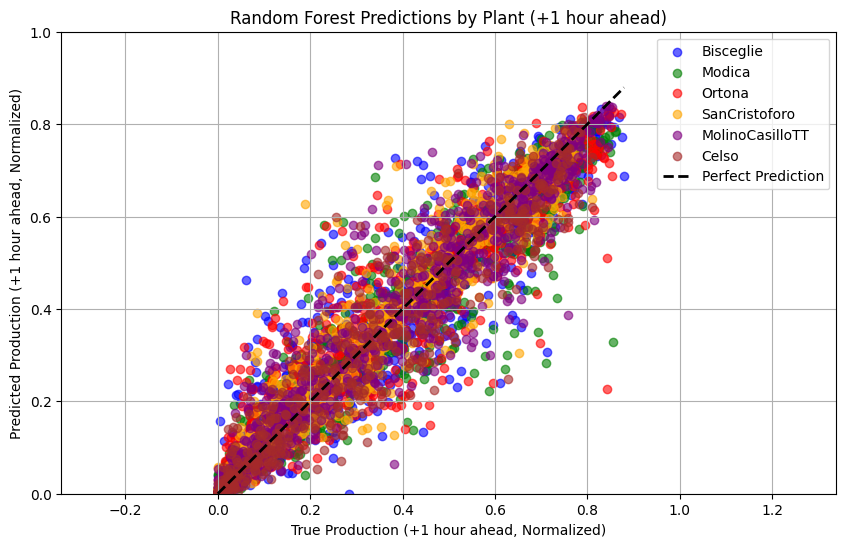

In [87]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure alignment
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create a DataFrame for predictions to include plant IDs
predictions_rf_df = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_rf,
    'pID': pID_test.reset_index(drop=True)  # Reset index to align correctly
})

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = predictions_rf_df['pID'] == plant  # Filter for each plant
    plt.scatter(predictions_rf_df['True'][plant_mask], predictions_rf_df['Predicted'][plant_mask], 
                color=color, alpha=0.6, label=plant)

# Add a reference line for perfect predictions
plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('True Production (+1 hour ahead, Normalized)')
plt.ylabel('Predicted Production (+1 hour ahead, Normalized)')
plt.title('Random Forest Predictions by Plant (+1 hour ahead)')
plt.legend()
plt.grid(True)  # Optional: add grid for better visibility
plt.axis('equal')  # Make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


In [90]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions for +1 hour ahead
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mape_value_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
mae_value_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_value_xgb = np.sqrt(root_mean_squared_error(y_test, y_pred_xgb))
r2_value_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost MAPE (+1 hour ahead): {mape_value_xgb:.2f}%")
print(f"XGBoost MAE (+1 hour ahead): {mae_value_xgb:.2f}")
print(f"XGBoost RMSE (+1 hour ahead): {rmse_value_xgb:.2f}")
print(f"XGBoost R² (+1 hour ahead): {r2_value_xgb:.2f}")


XGBoost MAPE (+1 hour ahead): 3210893662382.48%
XGBoost MAE (+1 hour ahead): 0.03
XGBoost RMSE (+1 hour ahead): 0.23
XGBoost R² (+1 hour ahead): 0.95


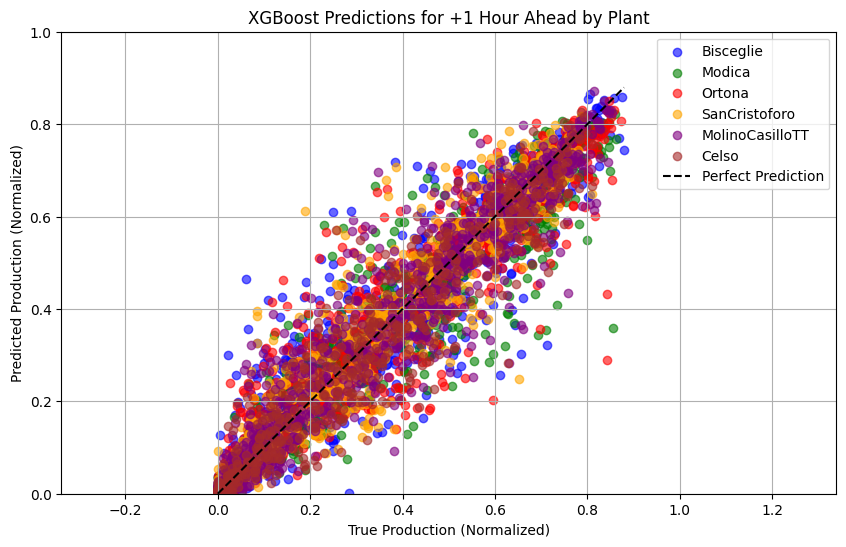

In [91]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a DataFrame for the true and predicted values along with plant IDs
predictions_df = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_xgb,
    'pID': pID_test.reset_index(drop=True)  # Reset index to align correctly with y_test
})

# Define a color map for each plant ID
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot scatter for each plant with a different color
for plant, color in colors.items():
    plant_mask = predictions_df['pID'] == plant
    plt.scatter(predictions_df['True'][plant_mask], predictions_df['Predicted'][plant_mask], 
                color=color, label=plant, alpha=0.6)

# Add a diagonal line representing perfect predictions
plt.plot([min(y_test.values), max(y_test.values)], 
         [min(y_test.values), max(y_test.values)], 
         color='black', linestyle='--', label='Perfect Prediction')

# Set plot labels and title
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('XGBoost Predictions for +1 Hour Ahead by Plant')

# Add legend and grid
plt.legend()
plt.grid(True)

# Set equal axis limits for better comparison
plt.axis('equal')
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range

# Show the plot
plt.show()
